### Sistema de Recomendación

In [1]:
# Importar librerías:
import numpy as np
import pandas as pd
import seaborn as sns
from math import sqrt
import geopandas as gpd
from apyori import apriori
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
from dateutil.parser import parse 
plt.rcParams.update({'figure.figsize': (8, 6), 'figure.dpi': 120})
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Cargar dataset
data = pd.read_csv('OnlineRetail.csv', encoding='ISO-8859-1')
data. head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# Elimino filas sin países
data = data.loc[(data['Country'] != "Unspecified")] 
# Calculo las ventas totatles
data['venta_total'] = data.Quantity * data.UnitPrice
# Convertir la columna "fecha_hora" a formato de fecha y hora
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
# Separar la fecha y los minutos/segundos en columnas separadas
data['Date'] = data['InvoiceDate'].dt.date
data['minutos_segundos'] = data['InvoiceDate'].dt.time
# Elimino la columna (que no usaré) InvoiceDate:
data = data.drop(['InvoiceDate'], axis=1)

In [4]:
data_2 = data.groupby("Country", group_keys=False, as_index=False).sum('venta_total')
data_2 = data_2.sort_values('venta_total',ascending=False)
data_2 = data_2[:21]
data_2.head(3)

,Country,Quantity,UnitPrice,CustomerID,venta_total
36,United Kingdom,4263829,2.245715e+06,5.626433e+09,8.187806e+06
24,Netherlands,200128,6.492550e+03,3.419054e+07,2.846615e+05
10,EIRE,142637,4.844719e+04,1.103917e+08,2.632768e+05


## Gráficos

<function matplotlib.pyplot.show(close=None, block=None)>

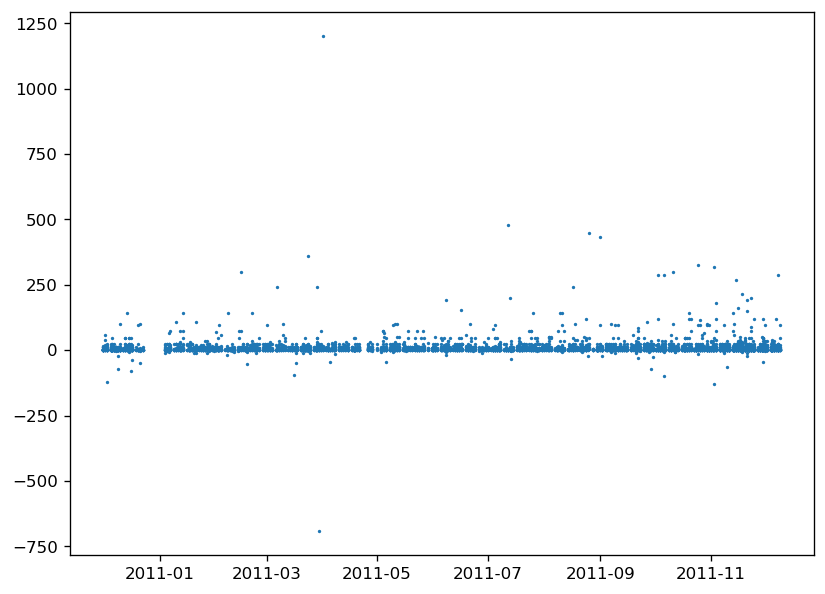

In [5]:
dataShort = data[::100]
plt.scatter(dataShort["Date"], dataShort["Quantity"] , s=1)
plt.show

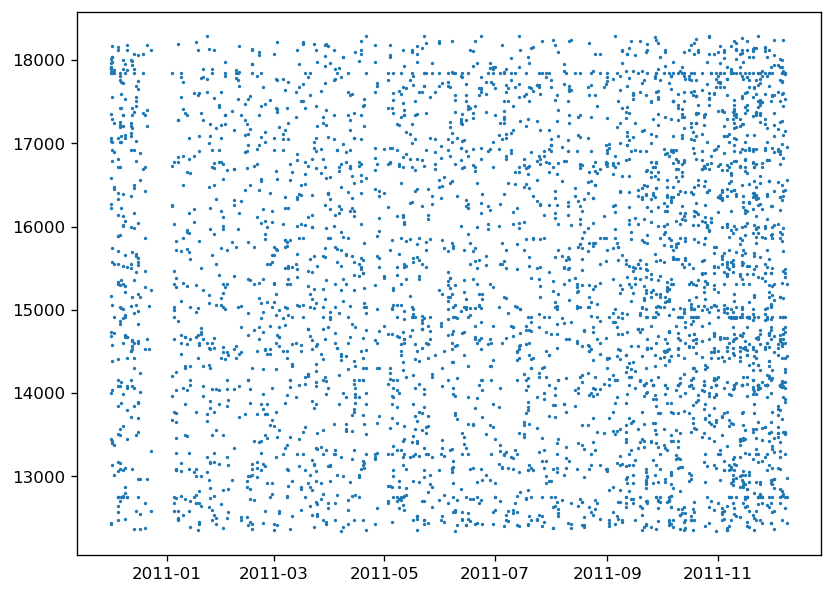

In [6]:
plt.scatter(dataShort["Date"], dataShort["CustomerID"], s=1)

In [7]:
data_2["logVentaTotal"] = np.log10(data_2["venta_total"])
data_2

,Country,Quantity,UnitPrice,CustomerID,venta_total,logVentaTotal
36,United Kingdom,4263829,2.245715e+06,5.626433e+09,8.187806e+06,6.913168
24,Netherlands,200128,6.492550e+03,3.419054e+07,2.846615e+05,5.454329
10,EIRE,142637,4.844719e+04,1.103917e+08,2.632768e+05,5.420413
14,Germany,117448,3.766600e+04,1.200751e+08,2.216982e+05,5.345762
13,France,110480,4.303199e+04,1.076489e+08,1.974039e+05,5.295356
0,Australia,83653,4.054750e+03,1.569300e+07,1.370773e+05,5.136965
33,Switzerland,30325,6.813690e+03,2.377592e+07,5.638535e+04,4.751166
31,Spain,26824,1.263345e+04,3.268929e+07,5.477458e+04,4.738579
3,Belgium,23152,7.540130e+03,2.571829e+07,4.091096e+04,4.611840
32,Sweden,35637,1.806830e+03,6.790083e+06,3.659591e+04,4.563433


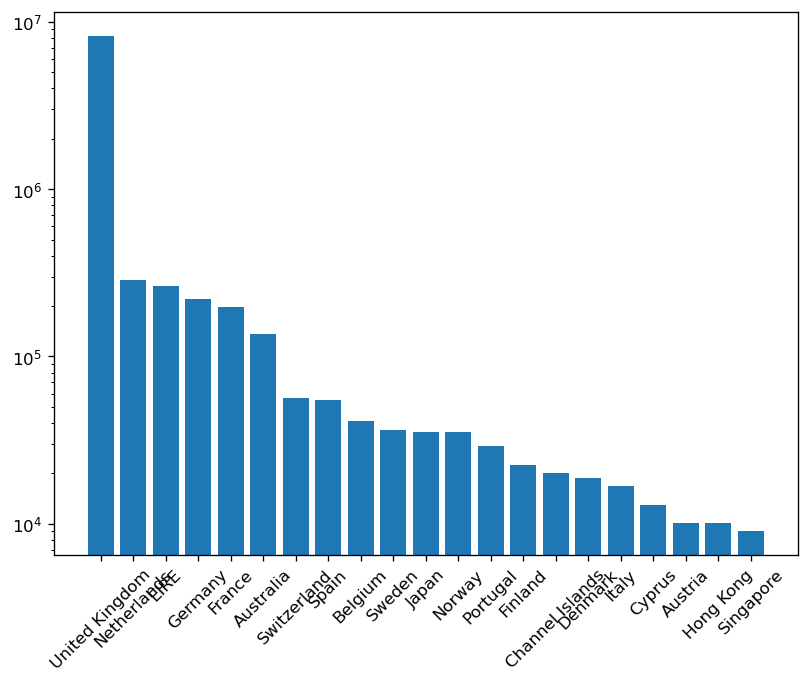

In [8]:
# Crear la gráfica de barras
plt.bar(data_2.Country, data_2['venta_total'])
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:>

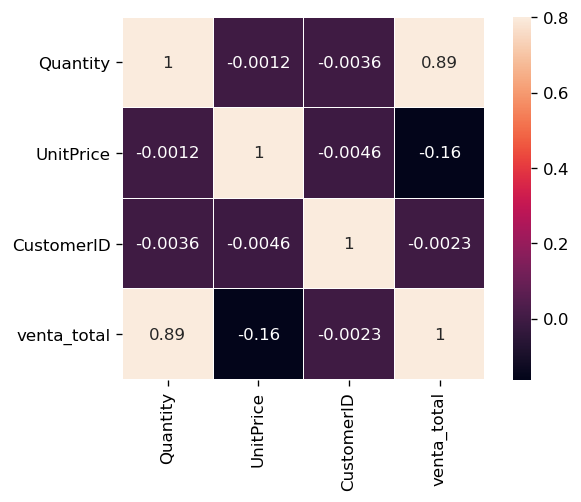

In [9]:
# Mapa de correlaciones
corr = data.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True,annot=True)

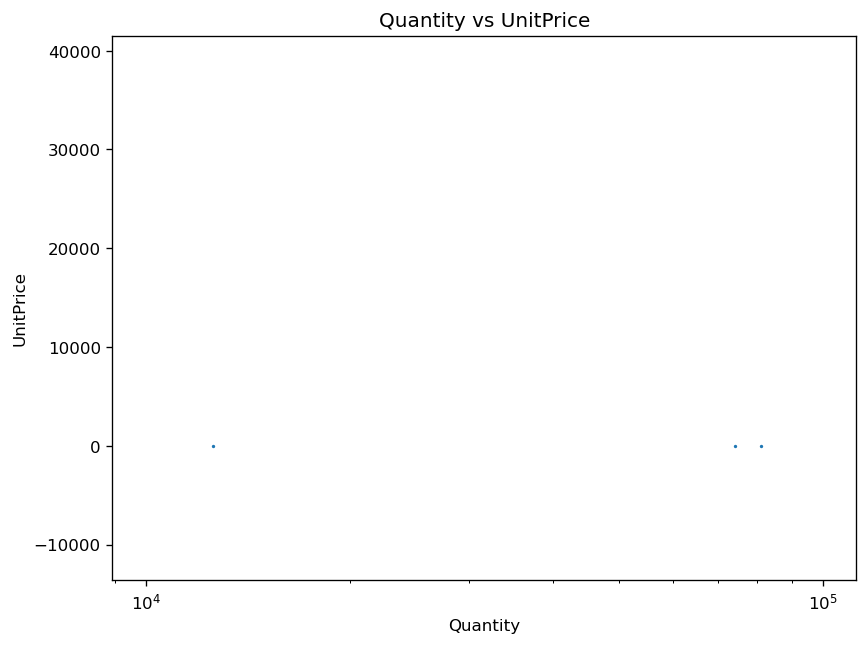

In [10]:
# Gráfica de dispersión (scatter) de Quantity vs UnitPrice 
plt.scatter(data['Quantity'], data['UnitPrice'], s=1)
plt.title("Quantity vs UnitPrice")
plt.xlabel("Quantity")
plt.ylabel("UnitPrice")
plt.xscale('log')
#plt.yscale('log')
plt.show()

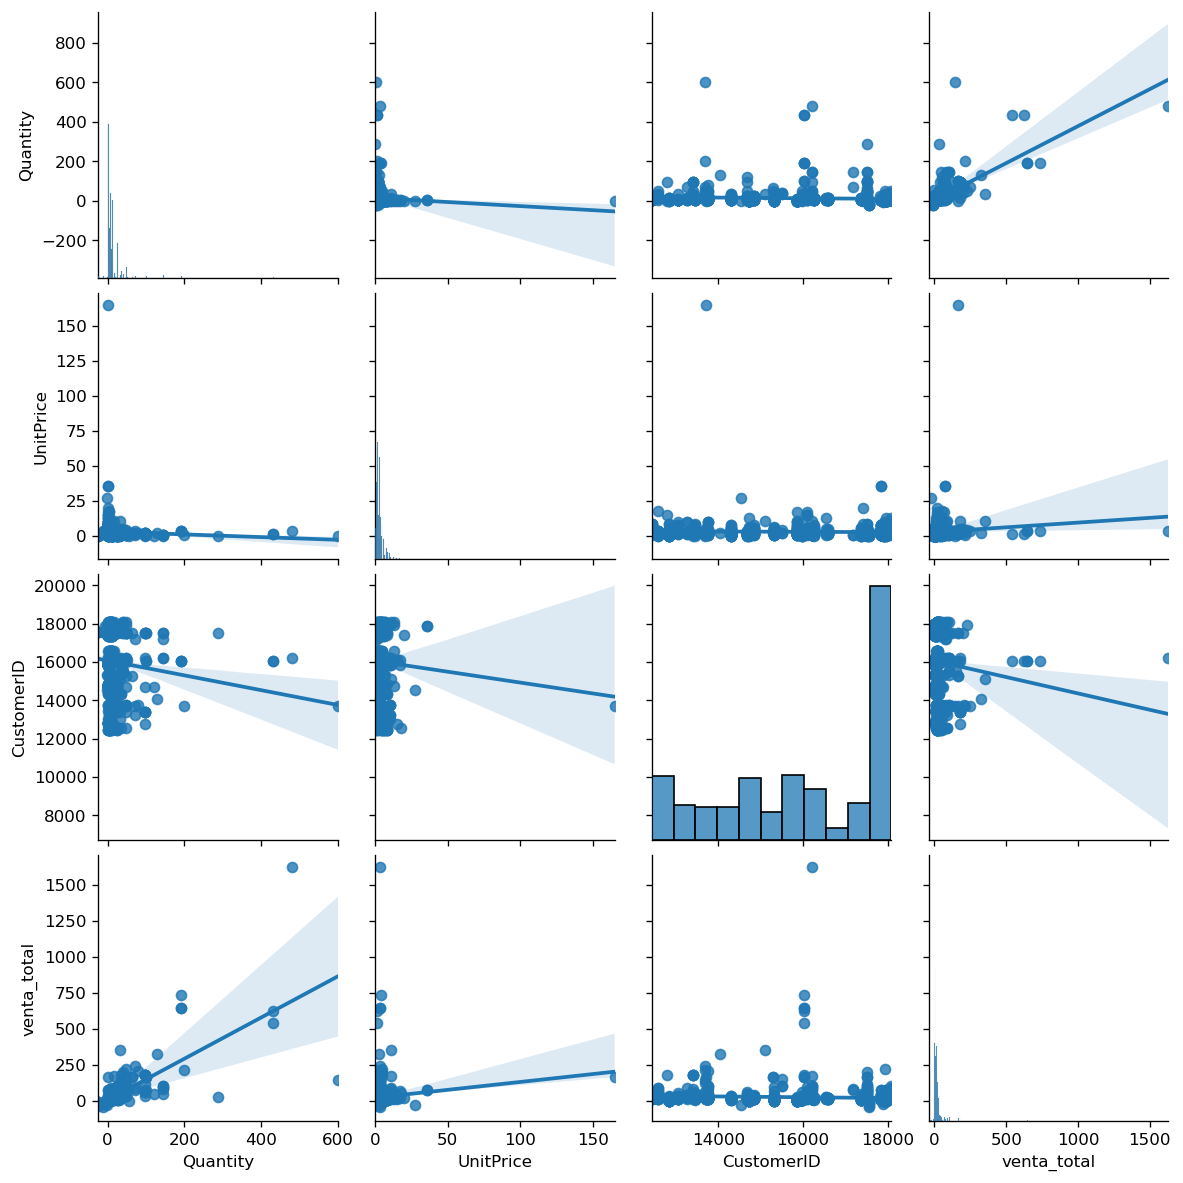

In [11]:
# Seaborn o PairGrid:
sns.pairplot(data[:1000], kind="reg")
plt.show()

In [12]:
data_vtas_totales_paises = data.groupby("Country", group_keys=False, as_index=False).sum('venta_total')
data_vtas_totales_paises = data_vtas_totales_paises.sort_values('venta_total',ascending=False)
data_vtas_totales_paises["logVentaTotal"] = np.log10(data_vtas_totales_paises["venta_total"])
data_vtas_totales_paises

,Country,Quantity,UnitPrice,CustomerID,venta_total,logVentaTotal
36,United Kingdom,4263829,2.245715e+06,5.626433e+09,8.187806e+06,6.913168
24,Netherlands,200128,6.492550e+03,3.419054e+07,2.846615e+05,5.454329
10,EIRE,142637,4.844719e+04,1.103917e+08,2.632768e+05,5.420413
14,Germany,117448,3.766600e+04,1.200751e+08,2.216982e+05,5.345762
13,France,110480,4.303199e+04,1.076489e+08,1.974039e+05,5.295356
0,Australia,83653,4.054750e+03,1.569300e+07,1.370773e+05,5.136965
33,Switzerland,30325,6.813690e+03,2.377592e+07,5.638535e+04,4.751166
31,Spain,26824,1.263345e+04,3.268929e+07,5.477458e+04,4.738579
3,Belgium,23152,7.540130e+03,2.571829e+07,4.091096e+04,4.611840
32,Sweden,35637,1.806830e+03,6.790083e+06,3.659591e+04,4.563433


In [13]:
titles=''.join(str(data.Description)).lower()
titles

"0          white hanging heart t-light holder\n1                         white metal lantern\n2              cream cupid hearts coat hanger\n3         knitted union flag hot water bottle\n4              red woolly hottie white heart.\n                         ...                 \n541904            pack of 20 spaceboy napkins\n541905           children's apron dolly girl \n541906          childrens cutlery dolly girl \n541907        childrens cutlery circus parade\n541908          baking set 9 piece retrospot \nname: description, length: 541463, dtype: object"

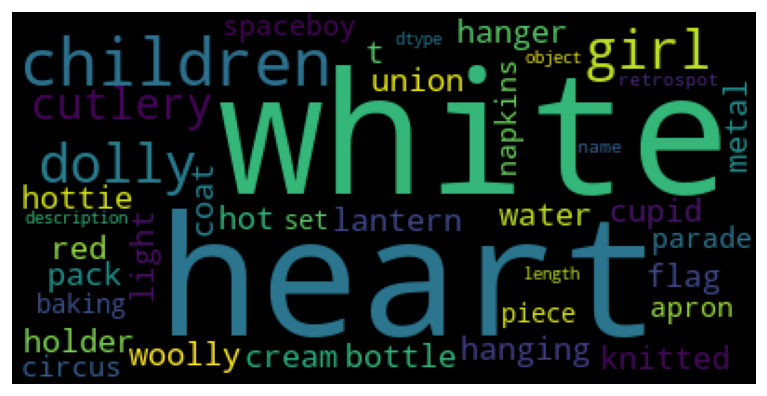

In [14]:
plt.figure(figsize=(8,6))
wordcloud = WordCloud(collocations=True, max_words=500 ).generate(titles)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

2. Construir un mapa que muestre número de compras totales por país y otro con número de compras relativas (per capita) por país.

In [15]:
# Lee los datos de los límites de los países
paises_geo_pandas = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# Listado completo: pd.set_option('display.max_rows', 200)
paises_geo_pandas.name.sort_values

<bound method Series.sort_values of 0                          Fiji
1                      Tanzania
2                     W. Sahara
3                        Canada
4      United States of America
                 ...           
172                      Serbia
173                  Montenegro
174                      Kosovo
175         Trinidad and Tobago
176                    S. Sudan
Name: name, Length: 177, dtype: object>

<AxesSubplot:>

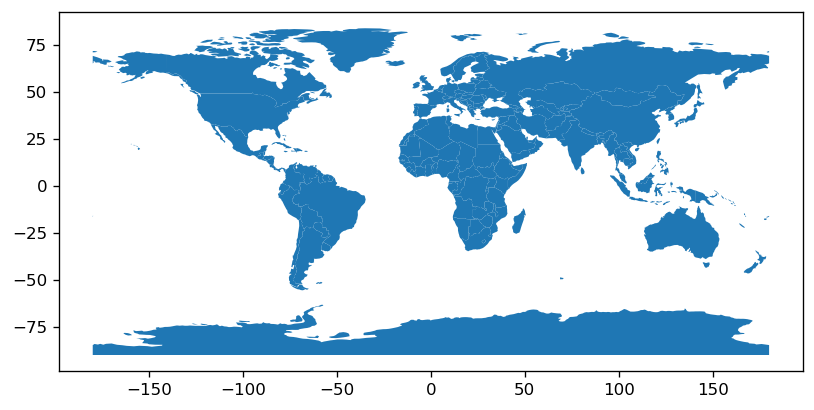

In [16]:
# Verificar si coincide los nombre de países del data frame con los del geopandas
#paises_geo_pandas.loc[paises_geo_pandas["name"]=="Iceland"]
# Crea una figura y un eje
fig, ax = plt.subplots(figsize=(8, 6))
# Dibuja los países en el mapa
paises_geo_pandas.plot(ax=ax)
# Muestra el mapa
#plt.show()   

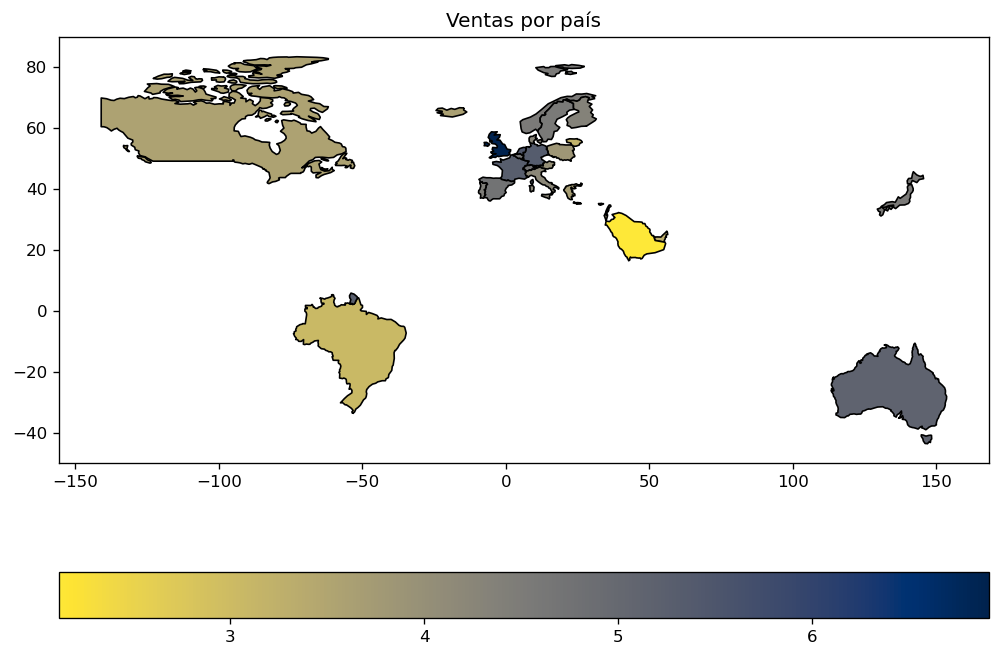

In [17]:
# Unir los datos de los países con los datos de ventas por país
data_merge = paises_geo_pandas.merge(data_vtas_totales_paises, left_on='name', right_on='Country')
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 8))
# Dibujar los países en el mapa y colorearlos según las ventas
data_merge.plot(ax=ax, column='logVentaTotal', cmap='cividis_r', linewidth=0.99, edgecolor='black', legend=True, legend_kwds={'orientation': "horizontal"})
# Añadir un título al mapa
ax.set_title('Ventas por país')    
#plt.yscale('log')
plt.show()

3. Analizar los horarios y calendarios de compra, mediante histogramas y estacionalidad.

In [18]:
# horas = pd.date_range(start=data['minutos_segundos'].min(),end=data['minutos_segundos'].max())
# dfHoras = pd.DataFrame(['minutos_segundos: Horas'])
# Horario de ventas totales: horario_vta_totales = data.groupby("minutos_segundos", group_keys=False, as_index=False).sum('venta_total')
# horario_vta_totales["logVentaTotal"] = np.log10(horario_vta_totales["venta_total"])
# Crear la gráfica de barras: plt.bar(horario_vta_totales.minutos_segundos, horario_vta_totales['venta_total'])
# plt.xticks(rotation=45)
# plt.show()

In [19]:
# Calendario de ventas:
calendario_cant_vta = data.groupby(['Date'], group_keys=False, as_index=False).sum('Quantity')
calendario_cant_vta[calendario_cant_vta['Quantity'] < 0]

,Date,Quantity,UnitPrice,CustomerID,venta_total
152,2011-06-14,-13752,6435.36,16007436.0,40211.93


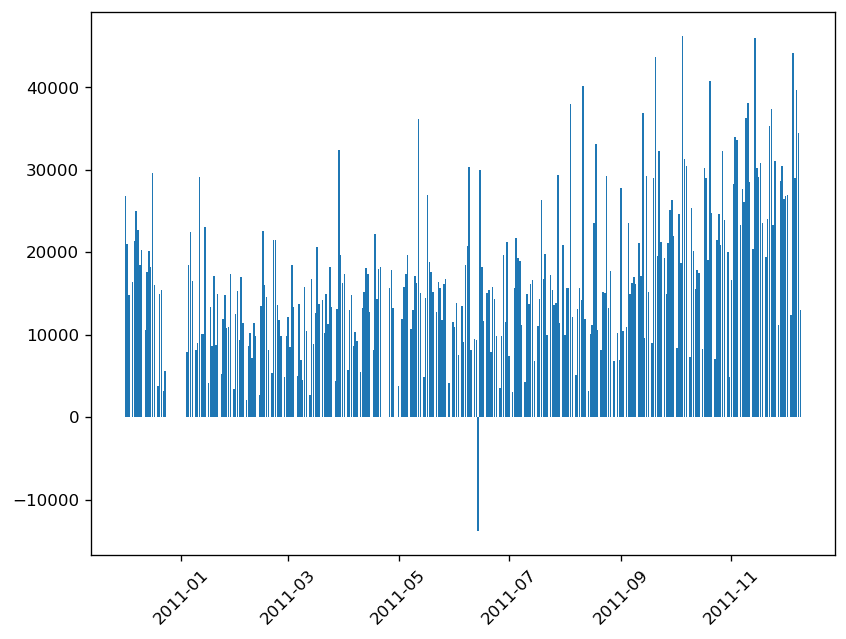

In [20]:
# Crear la gráfica de barras
plt.bar(calendario_cant_vta.Date, calendario_cant_vta['Quantity'])
#plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

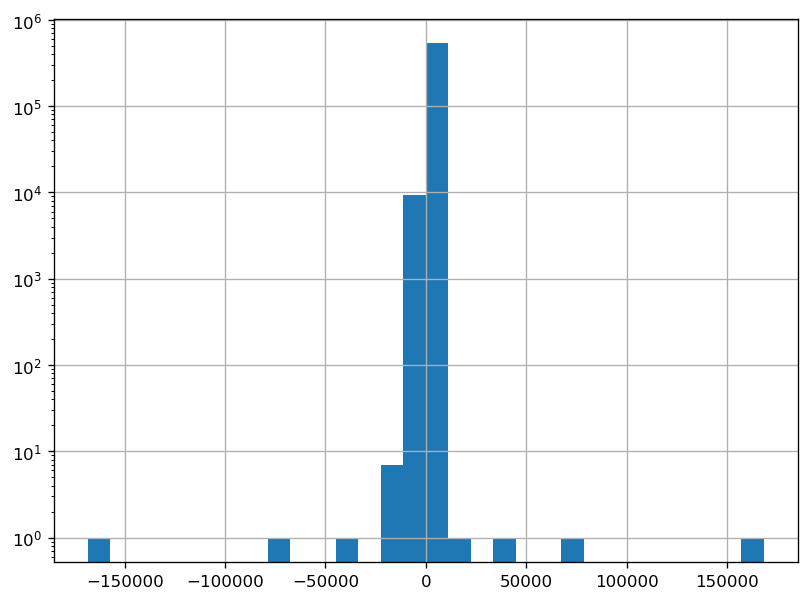

In [21]:
# Historama: Buscando bins más significativos (30 días = 1 mes)
data.venta_total.hist(bins=30)
plt.yscale('log')

4. Crear la **Customer-Item Matrix** mediante el método df.pivot_table

In [22]:
Customer_Item = pd.pivot_table(data, values='Quantity', index=['CustomerID'], columns=['StockCode'], aggfunc=np.sum)
Customer_Item.fillna(value=0, inplace=True)
Customer_Item.head(3)

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0


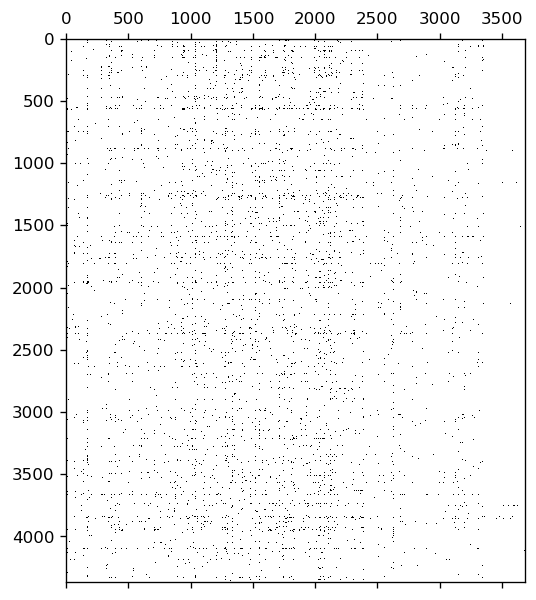

In [23]:
# Matriz para verificar queno todos los valores son NaN
plt.spy(Customer_Item)
plt.show()

5. Crear la **User to User Similarity Matrix** mediante la **distancia del coseno** con la librería sklearn

In [24]:
userUser = pd.DataFrame(cosine_similarity(Customer_Item))
userUser.head(2)

,0,1,2,3,4,5,6,7,8,9,...,4358,4359,4360,4361,4362,4363,4364,4365,4366,4367
0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000
1,0.0,1.0,0.148879,0.02075,0.014435,0.034833,0.0,0.023478,0.506252,0.186107,...,0.0,0.0,0.40706,-0.001245,0.015133,0.037236,0.0,0.011921,0.07451,0.108942


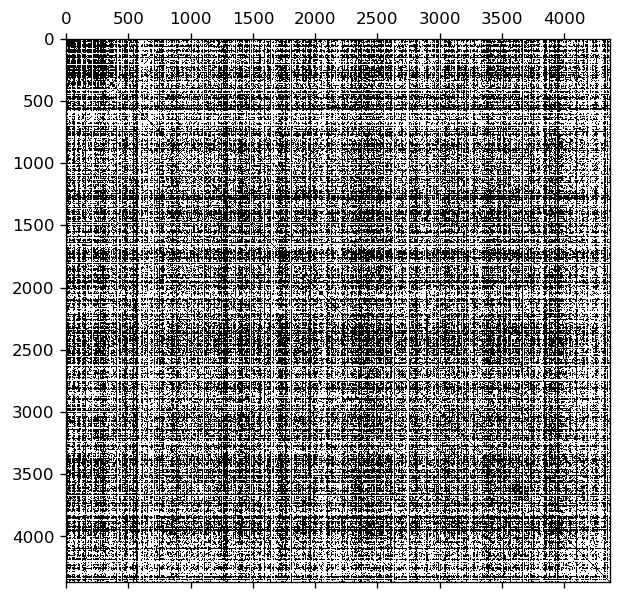

In [25]:
# Calculando la cantidad de usuarios. Matriz de user vs user:
userUser.shape
plt.spy(userUser)
plt.show()

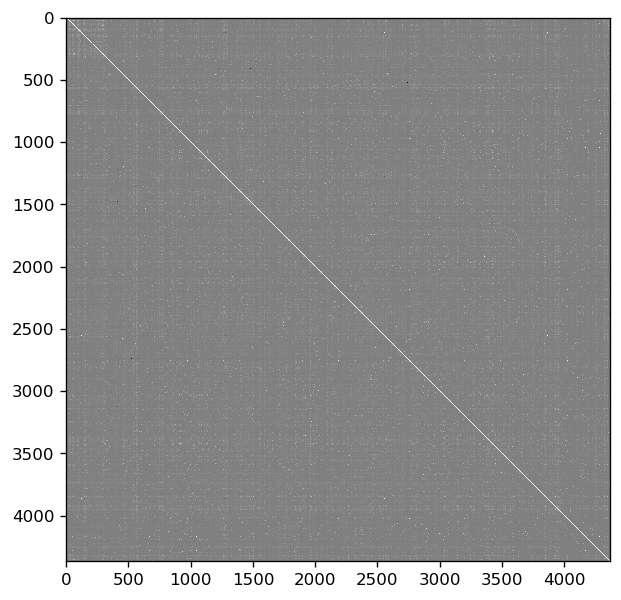

In [26]:
# Graficar matriz densa
plt.imshow(userUser, cmap='gray', interpolation='nearest')
plt.show()

6. Obtener las 10 recomendaciones de tipo **filtrado colaborativo por usuario**.

In [27]:
userUser.columns = Customer_Item.index
userUser.index = Customer_Item.index
userUser.head(2)

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000
12347.0,0.0,1.0,0.148879,0.02075,0.014435,0.034833,0.0,0.023478,0.506252,0.186107,...,0.0,0.0,0.40706,-0.001245,0.015133,0.037236,0.0,0.011921,0.07451,0.108942


In [28]:
userUser.iloc[1]

CustomerID
12346.0    0.000000
12347.0    1.000000
12348.0    0.148879
12349.0    0.020750
12350.0    0.014435
             ...   
18280.0    0.037236
18281.0    0.000000
18282.0    0.011921
18283.0    0.074510
18287.0    0.108942
Name: 12347.0, Length: 4368, dtype: float64

In [29]:
filtrado = userUser.iloc[1]
ranking = filtrado.sort_values(ascending = True)
ranking

CustomerID
14205.0   -0.072934
16742.0   -0.064460
17820.0   -0.062680
16428.0   -0.061159
14483.0   -0.004053
             ...   
12355.0    0.506252
14257.0    0.532188
12674.0    0.540213
14326.0    0.552321
12347.0    1.000000
Name: 12347.0, Length: 4368, dtype: float64

In [30]:
similares = ranking[(ranking > 0) & (ranking < 1)]
similares

CustomerID
13868.0    0.000025
18109.0    0.000046
14530.0    0.000067
13435.0    0.000115
15602.0    0.000123
             ...   
12355.0    0.506252
14257.0    0.532188
12674.0    0.540213
14326.0    0.552321
12347.0    1.000000
Name: 12347.0, Length: 3014, dtype: float64

In [31]:
Customer_Item.loc[list(similares.index)]

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
13868.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14530.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13435.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15602.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12355.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14257.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12674.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0


In [32]:
all = Customer_Item.loc[list(similares.index)].sum()
print(all.sort_values(ascending = False).head(10))

StockCode
22197     43581.0
84077     39199.0
85099B    37004.0
21212     32359.0
84879     31926.0
85123A    27305.0
23084     27094.0
22492     25880.0
21977     23940.0
22616     21838.0
dtype: float64


7. Obtener las 10 recomendaciones de tipo **filtrado colaborativo por producto** creando previamente la **Item to Item Similarity Matrix**.

In [33]:
ItemUser = pd.pivot_table(data, values='Quantity', index=['CustomerID'], columns=['Description'], aggfunc=np.sum)

In [34]:
ItemUser.CustomerID.index['12346.0']   
# ItemUser.loc['12346.0']  

AttributeError: 'DataFrame' object has no attribute 'CustomerID'

In [ ]:
ItemUser.fillna(value=0, inplace=True)
ItemUser.head(2)

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Item_Item = pd.DataFrame(cosine_similarity(ItemUser))
Item_Item.head(2)

,0,1,2,3,4,5,6,7,8,9,...,4358,4359,4360,4361,4362,4363,4364,4365,4366,4367
0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,0.0,1.0,0.148879,0.02075,0.014435,0.034833,0.0,0.022843,0.506252,0.186107,...,0.0,0.0,0.40706,-0.001245,0.015133,0.037236,0.0,0.011921,0.075245,0.108942


In [ ]:
filtrado_item_item = Item_Item.iloc[12347.0]

In [ ]:
ranking_item_item = filtrado_item_item.sort_values(ascending = False)
ranking_item_item

1       1.000000
1461    0.552321
270     0.539137
1417    0.532018
8       0.506252
          ...   
1577   -0.004053
3016   -0.061159
4025   -0.062680
3241   -0.064460
1375   -0.072934
Name: 1, Length: 4368, dtype: float64

In [ ]:
similares_item_item = ranking_item_item[(ranking_item_item > 0) & (ranking_item_item < 1)]
print(similares_item_item.sort_values(ascending = False).head(10))

1461    0.552321
270     0.539137
1417    0.532018
8       0.506252
3258    0.427193
3260    0.426946
895     0.410891
4360    0.407060
86      0.385802
3604    0.380090
Name: 1, dtype: float64


8. Obtener las 10 recomendaciones de tipo **basado en contenido** utilizando métricas de texto (Levenshtein o vectorización TF-IDF)

In [ ]:
# 1.- En la práctica que vimos el índex del dataframe sería un contador, en proyecto 4 el index podría ser el stockCode de los productos.
# 2.- En proyecto 4 ya tienes un dataframe con todo el texto en la columna "description": 
# tfidf_matrix = vectorizer.fit_transform(dfVentas["description"])
# 3.- Las recomendaciones serán el output después de calcular la matriz de similaridad, escoger un usuario de ejemplo para el cuál realizar las recomendaciones. Luego buscar los N usuarios más parecidos a éste en la matriz de similaridad. 
# Luego sumar sus respectivos patrones de compra. Esa suma ordenada será el output de recomendaciones.

In [55]:
palabras = pd.read_csv("archi_descripcion.csv", encoding="UTF-8")
palabras = palabras.dropna()
palabras

,Description
0,WHITE HANGING HEART T-LIGHT HOLDER
1,WHITE METAL LANTERN
2,CREAM CUPID HEARTS COAT HANGER
3,KNITTED UNION FLAG HOT WATER BOTTLE
4,RED WOOLLY HOTTIE WHITE HEART.
...,...
541458,PACK OF 20 SPACEBOY NAPKINS
541459,CHILDREN'S APRON DOLLY GIRL
541460,CHILDRENS CUTLERY DOLLY GIRL
541461,CHILDRENS CUTLERY CIRCUS PARADE


In [49]:
# Extraemos las palabras  
contador = CountVectorizer() 
# Codificamos como un vector
vectorizador = TfidfVectorizer(max_features=10)  
vectorizador

TfidfVectorizer(max_features=10)

In [56]:
# Crear una matriz dispersa
cantidades = contador.fit_transform(palabras.Description)
valores = vectorizador.fit_transform(palabras.Description)
print ("Vector de cantidades")
print (cantidades)
print ("Vector de valores")
print (valores)

Vector de cantidades
  (0, 2231)	1
  (0, 1006)	1
  (0, 1020)	1
  (0, 1208)	1
  (0, 1049)	1
  (1, 2231)	1
  (1, 1304)	1
  (1, 1176)	1
  (2, 586)	1
  (2, 614)	1
  (2, 1021)	1
  (2, 519)	1
  (2, 1004)	1
  (3, 1158)	1
  (3, 2172)	1
  (3, 833)	1
  (3, 1064)	1
  (3, 2215)	1
  (3, 298)	1
  (4, 2231)	1
  (4, 1020)	1
  (4, 1699)	1
  (4, 2256)	1
  (4, 1065)	1
  (5, 1825)	1
  :	:
  (540002, 1247)	1
  (540003, 1929)	1
  (540003, 624)	1
  (540003, 468)	1
  (540004, 1431)	1
  (540004, 1929)	1
  (540004, 1475)	1
  (540004, 58)	1
  (540004, 1386)	1
  (540005, 696)	1
  (540005, 943)	1
  (540005, 467)	1
  (540005, 155)	1
  (540006, 696)	1
  (540006, 943)	1
  (540006, 624)	1
  (540006, 468)	1
  (540007, 496)	1
  (540007, 1499)	1
  (540007, 624)	1
  (540007, 468)	1
  (540008, 1825)	1
  (540008, 1717)	1
  (540008, 1560)	1
  (540008, 186)	1
Vector de valores
  (0, 3)	1.0
  (4, 6)	0.6970925491562022
  (4, 3)	0.716981155896658
  (5, 8)	1.0
  (8, 6)	1.0
  (14, 4)	1.0
  (15, 9)	0.7511919895207982
  (15, 4)	0.66

In [60]:
# Generate matrix of word vectors
tfidf_matrix = vectorizador.fit_transform(palabras.Description)
# Print the shape of tfidf_matrix
print(tfidf_matrix.shape)

(540009, 10)


In [61]:
tokens = vectorizador.get_feature_names_out()
print(tokens)

AttributeError: 'TfidfVectorizer' object has no attribute 'get_feature_names_out'

In [62]:
# 3.- Le (hardcodeo) paso manualmente una lista con las recomendaciones?
pregunta = "PACK OF 20 SPACEBOY NAPKINS"

In [63]:
preguntaVector = vectorizador.transform([pregunta])
preguntaVector

<1x10 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [ ]:
# print(preguntaVector)
def vector2df(vector, tokens):
    dfPregunta = pd.DataFrame()

    # Obtener la frecuencia de cada token en la pregunta
    frecuencias = np.array(vector.sum(axis=0))[0]
    # Imprimir los tokens y sus frecuencias
    # La función zip(tokens, frecuencias) combina las listas tokens y frecuencias para formar una secuencia de tuplas
    for token, frecuencia in zip(tokens, frecuencias):
        if frecuencia > 0:
            # print(token, frecuencia)
            dfPregunta.loc[token, "frecuencia"] = frecuencia

    dfPregunta = dfPregunta.sort_values("frecuencia", ascending=False)
    return dfPregunta
vector2df(preguntaVector, tokens)

In [64]:
coseno_similares = cosine_similarity(preguntaVector, tfidf_matrix)
coseno_similares
# Obtener el índice de los 10 mayores números de una lista
mejores_resultados = np.argsort(coseno_similares)[0]
mejores_resultados = np.flip(mejores_resultados)[:100] # inverse rearrange on numpy
mejores_resultados

array([406809, 120003, 364262, 405477, 466125, 405480, 339965,  83814,
       278284, 466126, 331227,  25892, 120004, 331230, 364226, 156399,
       364225, 364224, 405521, 200225, 200226, 516074, 119988, 220690,
       220691,  16052, 311476, 331235, 240948, 274176, 232899, 240946,
        83769, 446282, 466095,  25920, 405396, 405397, 446275, 274173,
       278305, 364327, 331202, 446261, 278300, 364309, 481947, 511185,
        83793, 289672, 364285, 120059, 269169, 339967, 466097, 422470,
       501889, 262798, 405566, 278271, 529714, 292116, 240959, 405633,
         9270, 405634,   9272, 211545, 446125, 200235, 339932, 470635,
       156832,  16040, 178160,   9282, 331319, 185794, 262839, 185791,
       529688,  62055, 529686, 350512, 446100, 529683,  40814, 529715,
       119935,  83859, 119934, 200227, 278269, 262805, 278268, 185872,
       481939, 339946, 262810, 232918], dtype=int64)

In [65]:
for i in mejores_resultados:
    print(i)
    print(coseno_similares[0][i])
    # Obtener el vector de características del documento de interés
    vector_documento = tfidf_matrix[i]
    print(vector2df(vector_documento, tokens)[:5])
print(pregunta)
print("\n")

for i in mejores_resultados:
    print('"' + df["textos"][i] + '"')
    print("\t - " + enlaces[i] + "\n")    
print(pregunta)
respuesta = textos[coseno_similares.argmax()]
print("\n\t" + respuesta)
# df["textos"][coseno_similares.argmax()]

406809
1.0


NameError: name 'vector2df' is not defined

In [ ]:
# Obtener los componentes importantes de un vector de características del documento de resultado
print(vector2df(tfidf_matrix[coseno_similares.argmax()], tokens)[:50])
# Obtener las keywords importantes de un vector de características del documento de resultado
# Obtener la primera columna del dataframe como lista
for i in vector2df(tfidf_matrix[coseno_similares.argmax()], tokens).index[:40].tolist():
    print(i + ", ", end='')

In [ ]:
# keywords importantes de los primeros resultados
keywords = []
for i in mejores_resultados:
    # Obtener el vector de características del documento de interés
    vector_documento = tfidf_matrix[i]

    for j in vector2df(vector_documento, tokens).index[:100].tolist():
        keywords.append(j)

In [ ]:
# Extraer los elementos de una lista ordenados por frecuencia descendiente
contador = Counter(keywords)
ordenados_por_frecuencia = sorted(contador.items(), key=lambda x: x[1], reverse=True)

In [ ]:
# ordenados_por_frecuencia
for i in ordenados_por_frecuencia:
    print(i[0] + "|", end='')
print("\n")
for i in ordenados_por_frecuencia:
    print(i[0] + ", ", end='')            

9. Realizar un **market basket analysis** para detectar **bundles** (packs) de productos. Algoritmos de clusterización como K-means podrían detectar los bundles más frecuentes.

In [ ]:
#mlens= pd.read_csv('OnlineRetail.csv', encoding='ISO-8859-1')
mlens = data.rename(columns={'CustomerID': "user_id", "StockCode" : "item_id", "UnitPrice" : "rating", "Date" : "timestamp"}, inplace=True)

In [ ]:
mlens = data.drop(["InvoiceNo", "Description", "Quantity", "Country"], axis=1)
mlens

In [ ]:
# primero vamos a mapear los ids de usuario y de pelicula a un nuevo id que sea un indice
user2ix = {user:ix for ix,user in enumerate(mlens.user_id.unique())}
ix2user = {user2ix[k]:k for k in user2ix.keys()}

item2ix = {item:ix for ix,item in enumerate(mlens.item_id.unique())}
ix2item = {item2ix[k]:k for k in item2ix.keys()}

In [ ]:
mlens_con_ix = mlens.copy()

In [ ]:
# Eliminar los NaN: 
mlens_2 = mlens.notna()

In [ ]:
mlens_con_ix["user_id"] = mlens_2.user_id.apply(lambda x: user2ix[x])
mlens_con_ix["item_id"] = mlens_2.item_id.apply(lambda x: item2ix[x])

In [ ]:
# hacemos un pivot sobre el dataframe para tener la matriz usuario-item, esta no es la forma mas eficiente: estamos usando un dataframe
# pero pdist y cdist no toman una sparse matrix como input, para este problema no requerimos una sparse matrix necesariamente:
mlens_pivotada = mlens.pivot("item_id","user_id")["rating"]
# ValueError: Index contains duplicate entries, cannot reshape

In [ ]:
# calculando la similitud
similitudes = squareform(pdist(mlens_pivotada,metric=fast_cosine))

In [ ]:
# Función que devuelva el rating original si este existe, caso contrario, devuelve el predicho:
def predecir(user,item,similitudes,original,user2ix,item2ix):
    ix_user = user2ix[user]
    ix_item = item2ix[item]
    score = original.iloc[ix_item,ix_user]
    if np.isnan(score):
        item_similitudes = similitudes[:,ix_item]
        user_scores = original.iloc[:,ix_user].values
        k = np.nansum(item_similitudes[~np.isnan(user_scores)]) ## este es el denominador de la funcion
        
        if k == 0: 
            ## si nadie le puso puntaje al item o las similitudes son todas 0 devuelvo un score arbitrario
            return 2.5
        
        score = np.nansum(user_scores*item_similitudes)
        score = score/k
    return scoreuser = 554

In [ ]:
item = 651
predecir(user,item,similitudes,mlens_pivotada,user2ix,item2ix)